In [7]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from collections import OrderedDict
torch.set_printoptions(edgeitems=2, linewidth=75)
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]
t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

t_un_train , t_un_train.shape , t_un_val , t_un_val.shape

(tensor([[4.8400],
         [4.8900],
         [5.8200],
         [5.5900],
         [3.5700],
         [6.8400],
         [8.1900],
         [5.6300],
         [6.0400]]),
 torch.Size([9, 1]),
 tensor([[2.1800],
         [3.3900]]),
 torch.Size([2, 1]))

In [3]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [5]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 10)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(10, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 119.6215, Validation loss 511.5898
Epoch 1000, Training loss 5.5714, Validation loss 59.9512
Epoch 2000, Training loss 3.2347, Validation loss 27.4444
Epoch 3000, Training loss 2.6758, Validation loss 17.0844
Epoch 4000, Training loss 2.4183, Validation loss 11.8026
Epoch 5000, Training loss 2.2512, Validation loss 8.8201


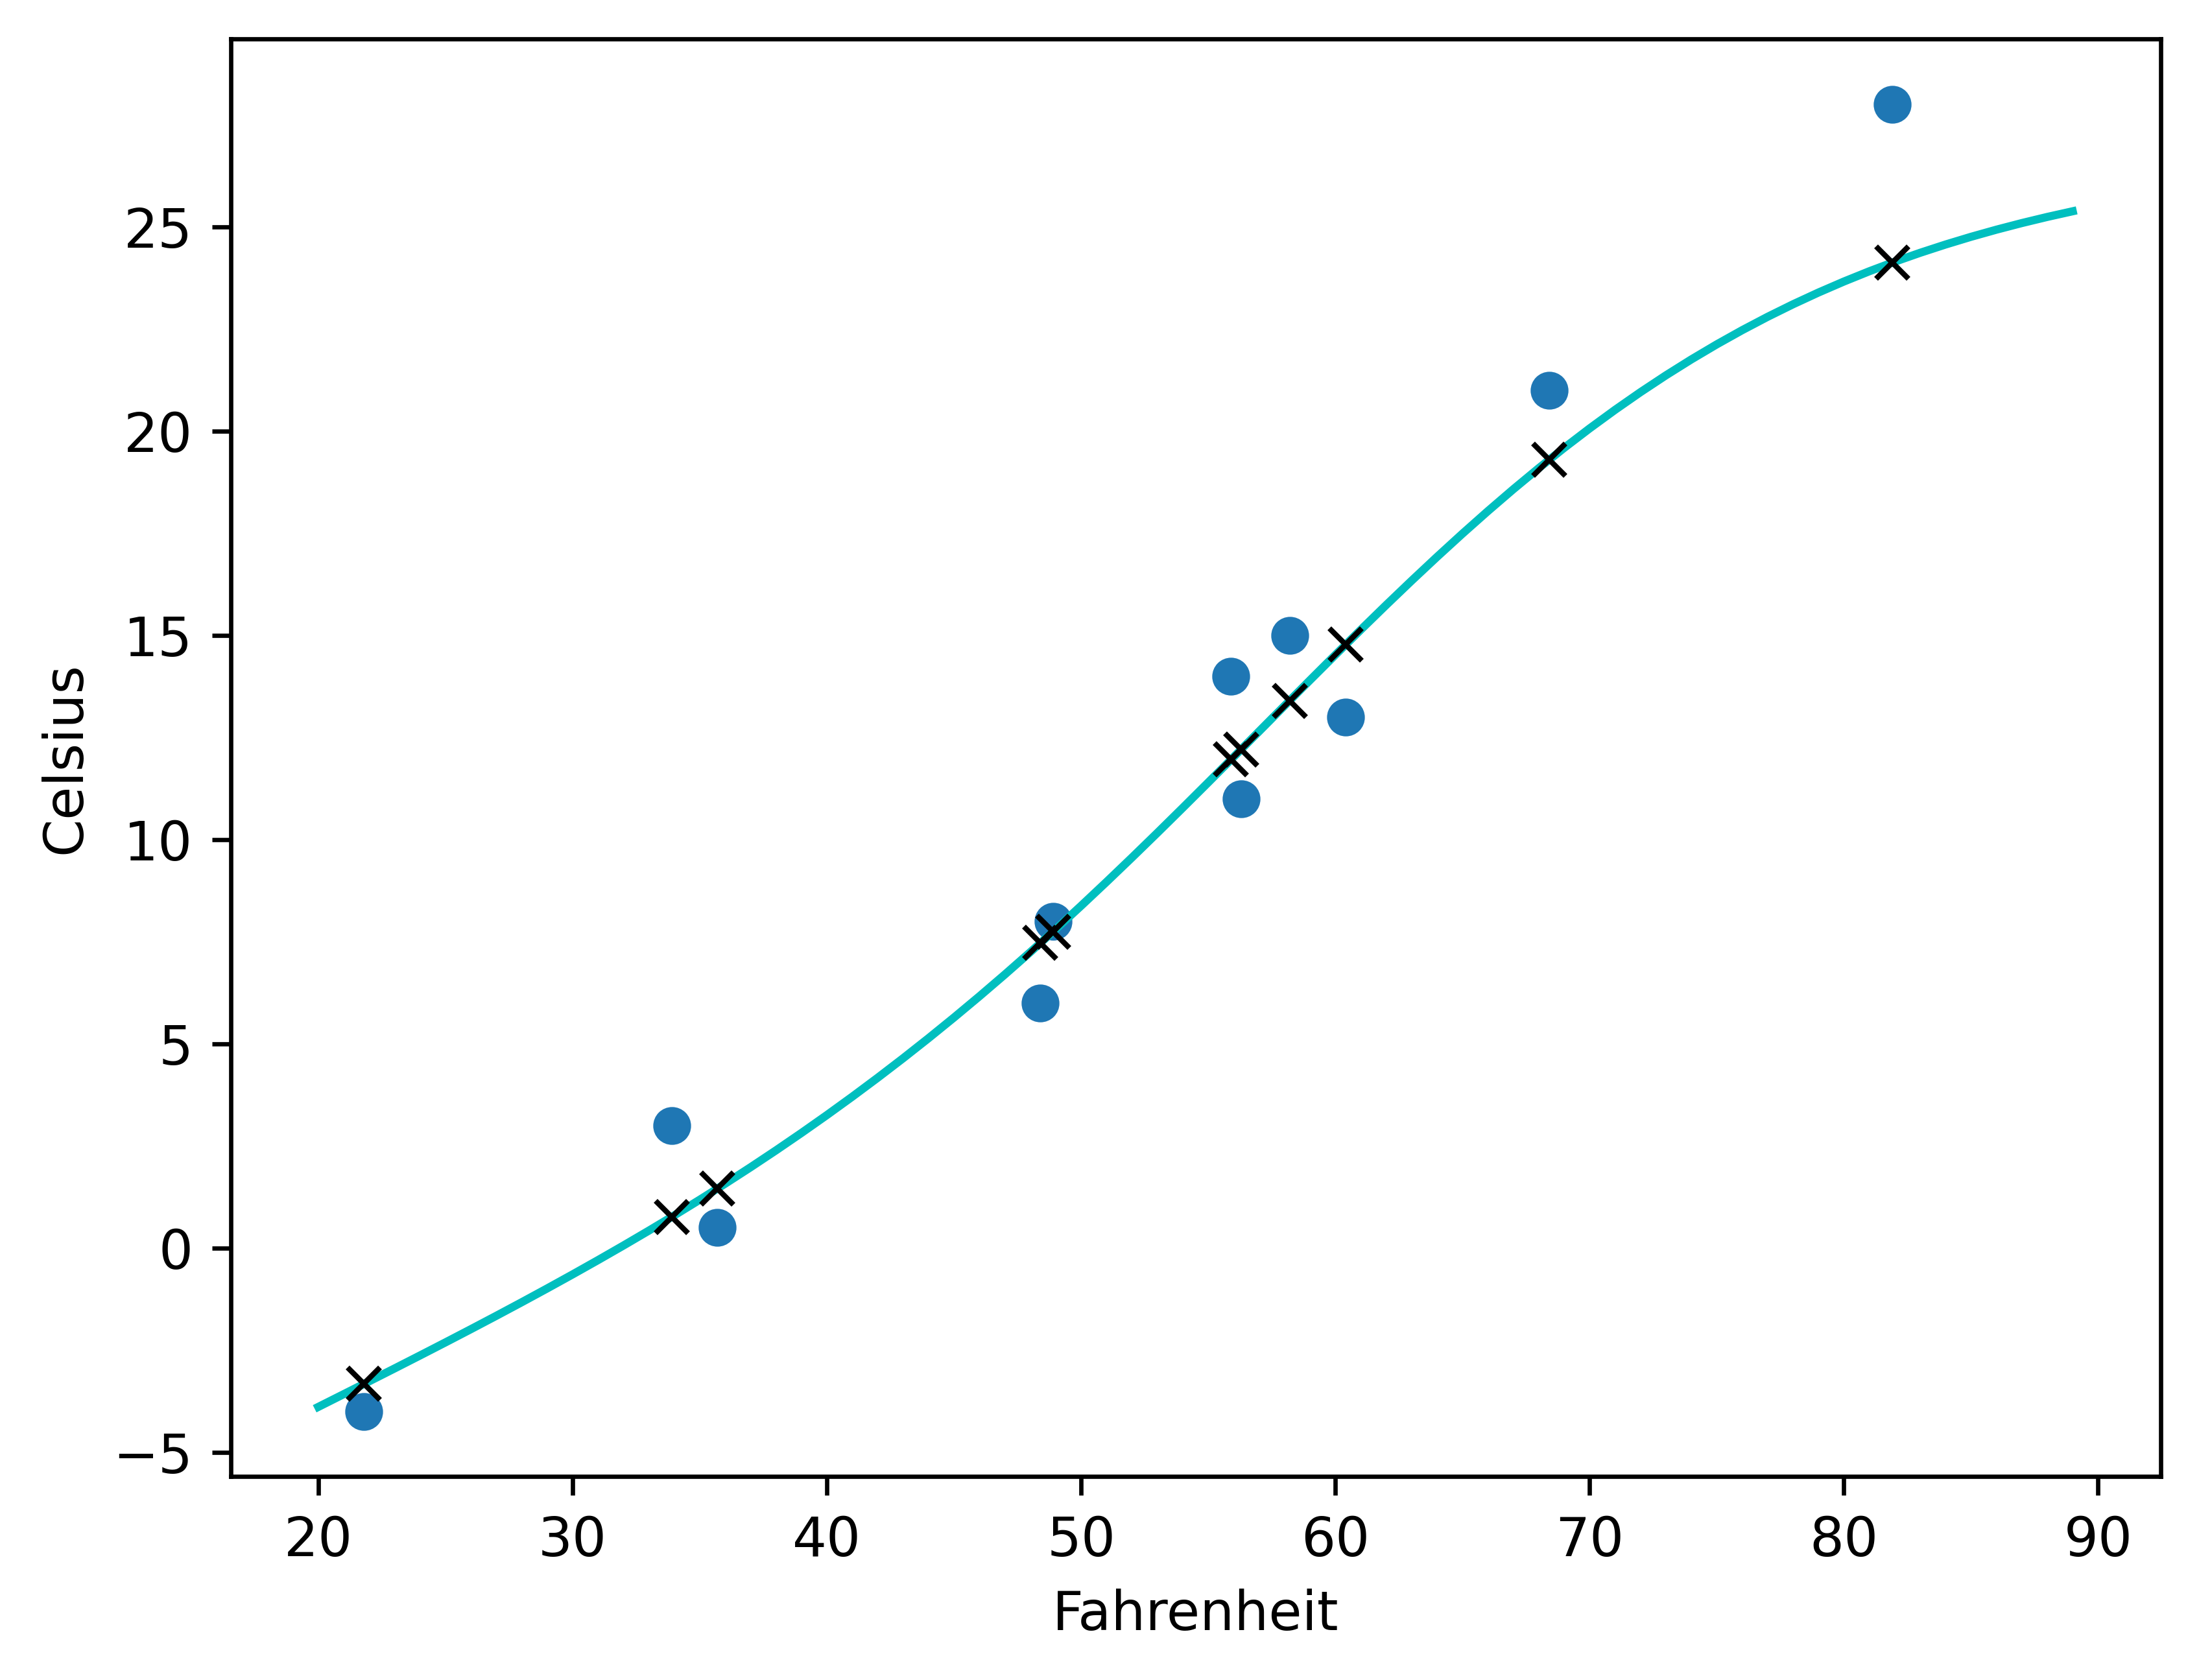

In [8]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1) # 20~90까지

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')